# Importing Libraries

In [47]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [3]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [4]:
cursor.execute("""select name from sqlite_master 
                    where type='table';""")
print("List of tables present in the database")
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [5]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [6]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [7]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [8]:
bookings = pd.read_sql_query("select * from bookings", connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [9]:
flights = pd.read_sql_query("select * from flights", connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [10]:
seats = pd.read_sql_query("select * from seats", connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [11]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [12]:
tickets = pd.read_sql_query("select * from tickets", connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [13]:
for table in table_list:
    print("\nTable:", table)
    print("-" * 25)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


Table: aircrafts_data
-------------------------
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

Table: airports_data
-------------------------
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

Table: boarding_passes
-------------------------
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

Table: bookings
-------------------------
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

Table: flights
-------------------------
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone

In [14]:
for table in table_list:
    print("\nTable:", table)
    print("-" * 25)
    df_table = pd.read_sql_query(f"select * from {table}", connection)
    print(df_table.isnull().sum())


Table: aircrafts_data
-------------------------
aircraft_code    0
model            0
range            0
dtype: int64

Table: airports_data
-------------------------
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Table: boarding_passes
-------------------------
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Table: bookings
-------------------------
book_ref        0
book_date       0
total_amount    0
dtype: int64

Table: flights
-------------------------
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Table: seats
-------------------------
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Table: ticket_flights
-------------------------
ticket_no          

# Basic Analysis

#### How many planes have more than 100 seats?

In [15]:
more_than_100_seats = pd.read_sql_query("""select aircraft_code,COUNT(seat_no) AS No_of_seats FROM seats 
                                            GROUP BY aircraft_code
                                            HAVING No_of_seats > 100
                                            ORDER BY No_of_seats DESC""", connection)

more_than_100_seats

,aircraft_code,No_of_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


#### How the number of tickets booked and total amount earned changed with time?

In [17]:
tickets = pd.read_sql_query(f"""SELECT * from tickets AS T
                                            INNER JOIN bookings AS B ON 
                                            T.book_ref = B.book_ref""", connection)
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date

,ticket_no,book_ref,passenger_id,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [23]:
x = tickets.groupby('date')[['date']].count()
x

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


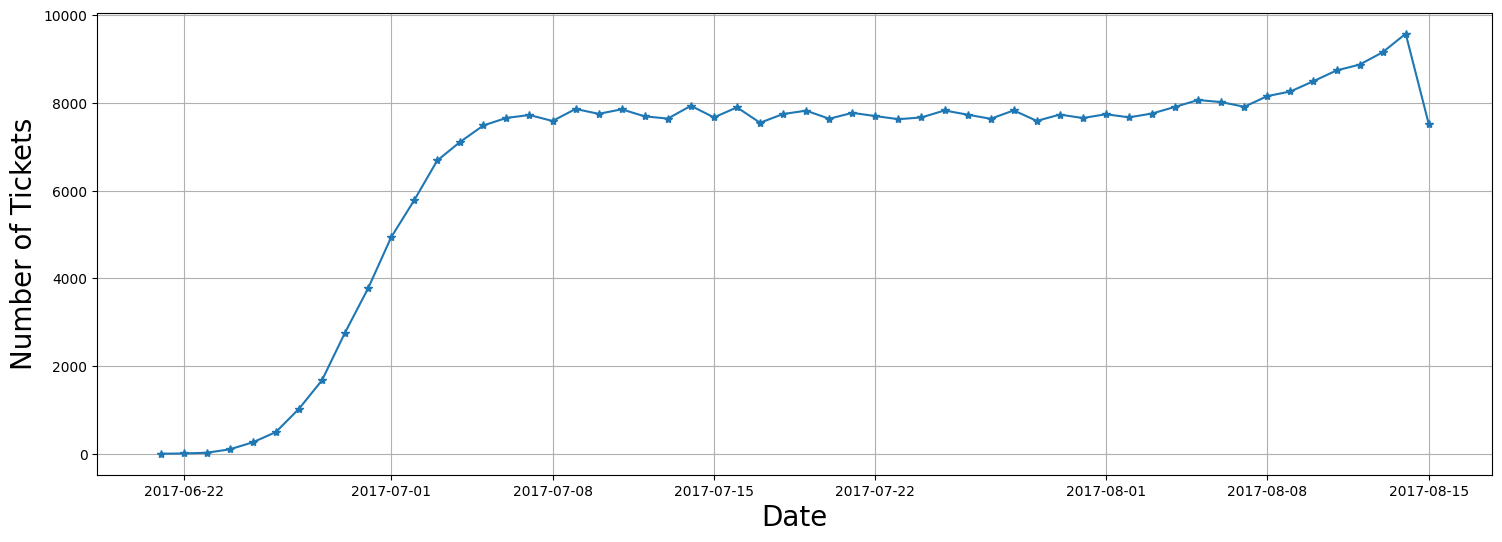

In [26]:
plt.figure(figsize=(18,6))
plt.plot(x.index, x['date'], marker='*')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

In [31]:
bookings = pd.read_sql_query(f"""SELECT * from bookings""", connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
bookings

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


In [32]:
y = bookings.groupby('date')[['total_amount']].sum()
y

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


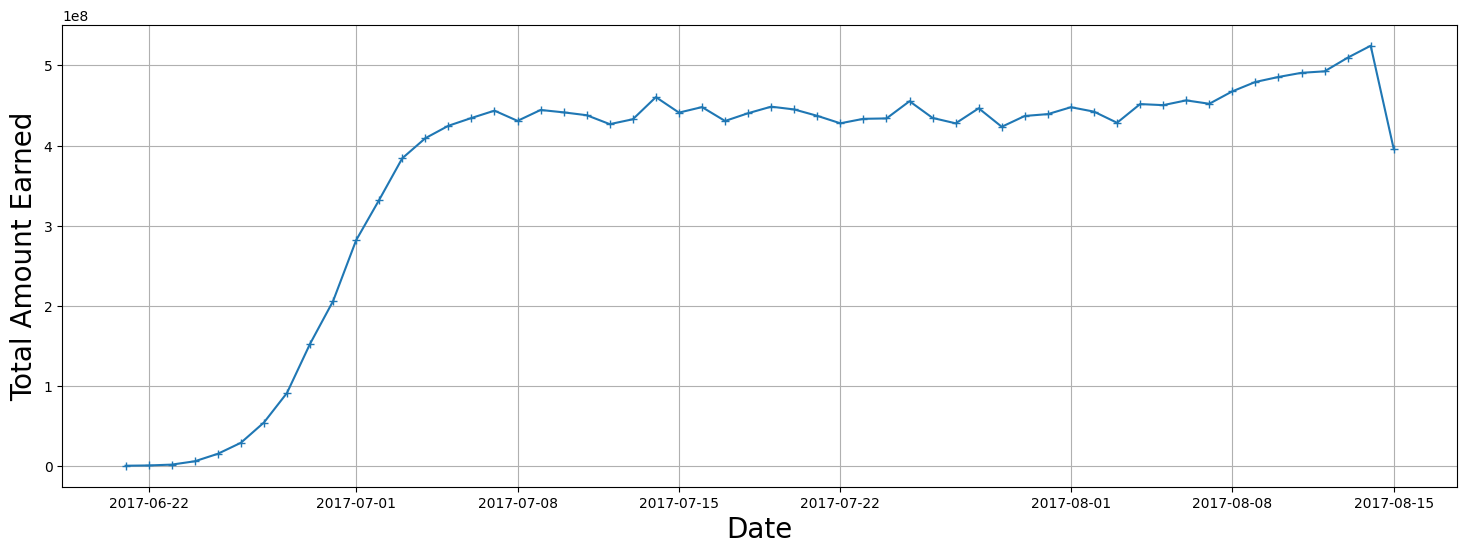

In [35]:
plt.figure(figsize=(18,6))
plt.plot(y.index, y['total_amount'], marker='+')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

#### Calculate the average charges for each aircraft with different fare conditions

In [36]:
average = pd.read_sql_query(f"""SELECT * from ticket_flights AS T
                                            INNER JOIN flights AS F ON 
                                            T.flight_id = F.flight_id""", connection)
average

,ticket_no,flight_id,fare_conditions,amount,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,0005432159776,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
1,0005435212351,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
2,0005435212386,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
3,0005435212381,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
4,0005432211370,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045721,0005435097522,32094,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045722,0005435097521,32094,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045723,0005435104384,32094,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045724,0005435104352,32094,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N


In [46]:
df = pd.read_sql_query(f"""SELECT aircraft_code, fare_conditions, avg(amount) AS average_charges from ticket_flights AS T
                                            INNER JOIN flights AS F ON 
                                            T.flight_id = F.flight_id
                                            GROUP BY aircraft_code, fare_conditions""", connection)
df

,aircraft_code,fare_conditions,average_charges
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


<Axes: xlabel='aircraft_code', ylabel='average_charges'>

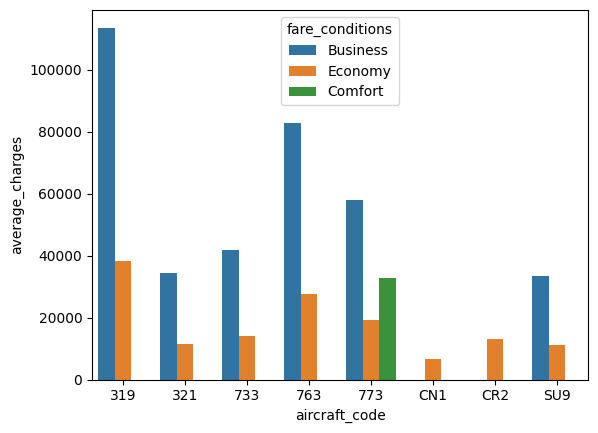

In [48]:
sns.barplot(data=df, x='aircraft_code', y='average_charges', hue='fare_conditions')

# Analyzing Occupancy rate

#### For each aircraft, calculate the total revenue per year and the average revenue per ticket.

In [54]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code,COUNT(*) as ticket_count, sum(amount) AS total_revenue_per_year from ticket_flights AS T
                                            INNER JOIN flights AS F ON 
                                            T.flight_id = F.flight_id
                                            group by aircraft_code
                                            ORDER BY total_revenue_per_year DESC""", connection)
total_revenue

,aircraft_code,ticket_count,total_revenue_per_year
0,SU9,365698,5114484700
1,763,124774,4371277100
2,773,144376,3431205500
3,319,52853,2706163100
4,CR2,150122,1982760500
5,321,107129,1638164100
6,733,86102,1426552100
7,CN1,14672,96373800


In [55]:
avg_ticket_revenue = pd.read_sql_query("""SELECT aircraft_code, ticket_count,
                                            total_revenue_per_year, 
                                            (total_revenue_per_year/ticket_count) AS avg_ticket_revenue
                                            from (SELECT aircraft_code,COUNT(*) as ticket_count, sum(amount) AS total_revenue_per_year from ticket_flights AS T
                                            INNER JOIN flights AS F ON 
                                            T.flight_id = F.flight_id
                                            group by aircraft_code
                                            ORDER BY total_revenue_per_year DESC)""", connection)
avg_ticket_revenue

,aircraft_code,ticket_count,total_revenue_per_year,avg_ticket_revenue
0,SU9,365698,5114484700,13985
1,763,124774,4371277100,35033
2,773,144376,3431205500,23765
3,319,52853,2706163100,51201
4,CR2,150122,1982760500,13207
5,321,107129,1638164100,15291
6,733,86102,1426552100,16568
7,CN1,14672,96373800,6568


#### Calculate the average occupancy per aircraft

In [70]:
occupancy_rate = pd.read_sql_query("""SELECT T1.aircraft_code, AVG(T1.seats_occupied) AS booked_seats,
                                        T2.num_of_seats, (AVG(T1.seats_occupied)/T2.num_of_seats) AS occupancy_rate
                                        
                                        from
                                        
                                        (SELECT F.aircraft_code, F.flight_id, COUNT(*) 
                                        as seats_occupied from boarding_passes B
                                        INNER JOIN flights F ON 
                                        B.flight_id = F.flight_id
                                        GROUP BY F.aircraft_code, F.flight_id) AS T1
                                        
                                        INNER JOIN 
                                        
                                        (SELECT aircraft_code, COUNT(*) AS num_of_seats from seats
                                        GROUP BY aircraft_code) AS T2
                                        ON T1.aircraft_code = T2.aircraft_code
                                        GROUP BY T1.aircraft_code""", connection)
occupancy_rate

,aircraft_code,booked_seats,num_of_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


#### Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [71]:
occupancy_rate['Inc_occupancy_rate'] = occupancy_rate['occupancy_rate'] * 1.1
occupancy_rate

,aircraft_code,booked_seats,num_of_seats,occupancy_rate,Inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [75]:
pd.set_option('display.float_format', str)

In [76]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, sum(amount) As total_revenue
                                        from ticket_flights AS T
                                        JOIN flights AS F ON T.flight_id = F.flight_id
                                        GROUP BY aircraft_code""", connection)
occupancy_rate['Inc_total_ann_turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc_occupancy_rate']
occupancy_rate

,aircraft_code,booked_seats,num_of_seats,occupancy_rate,Inc_occupancy_rate,Inc_total_ann_turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372493,3774326050.0000005
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484383,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.6442610715841441,5625933170.000001
